<a href="https://colab.research.google.com/github/Rishita32/Data_Science_Lab/blob/main/RishitaMote_Exp7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from nltk.stem.porter import *
from sklearn import metrics
from sklearn.metrics import mean_squared_error, confusion_matrix, classification_report, auc, accuracy_score, roc_curve
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [33]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True) 
df = pd.read_csv('/content/drive/MyDrive/emails.csv')


Mounted at /content/drive


In [34]:
df

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1
...,...,...
5723,Subject: re : research and development charges...,0
5724,"Subject: re : receipts from visit jim , than...",0
5725,Subject: re : enron case study update wow ! a...,0
5726,"Subject: re : interest david , please , call...",0


#Problem 1.1 – Loading the Dataset

##How many emails are in the dataset?

In [35]:
#Ans: 5728 emails
df.shape

(5728, 2)

##How many of the emails are spam? 

In [36]:
#Ans: 1368
len(df[df['spam'] == 1])

1368

##Which word appears at the beginning of every email in the dataset? Respond as a lower-case word with punctuation removed.

In [37]:
#Ans: subject
for i in range(len(df)):
  print(df['text'][i].split(' ')[0][:-1].lower())

Streaming output truncated to the last 5000 lines.
subject
subject
subject
subject
subject
subject
subject
subject
subject
subject
subject
subject
subject
subject
subject
subject
subject
subject
subject
subject
subject
subject
subject
subject
subject
subject
subject
subject
subject
subject
subject
subject
subject
subject
subject
subject
subject
subject
subject
subject
subject
subject
subject
subject
subject
subject
subject
subject
subject
subject
subject
subject
subject
subject
subject
subject
subject
subject
subject
subject
subject
subject
subject
subject
subject
subject
subject
subject
subject
subject
subject
subject
subject
subject
subject
subject
subject
subject
subject
subject
subject
subject
subject
subject
subject
subject
subject
subject
subject
subject
subject
subject
subject
subject
subject
subject
subject
subject
subject
subject
subject
subject
subject
subject
subject
subject
subject
subject
subject
subject
subject
subject
subject
subject
subject
subject
subject
subject
subje

##The nchar() function counts the number of characters in a piece of text. How many characters are in the longest email in the dataset (where longest is measured in terms of the maximum number of characters)?

In [38]:
idx = 0

max_len = len(df['text'][0])

for i in range(len(df)):
  if(len(df["text"][i]) > max_len):
    idx = i
    max_len = len(df["text"][i])
    
max_len

43952

#Problem 2.1 -Preparing the Corpus

In [39]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [40]:
#checking if word the code length(stopwords("english")) return 174 or not. 
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
print(len(stopwords.words('english')))

179


### Build a new corpus variable called corpus. 

In [41]:
corpus = df.copy()

### Convert the text to lowercase.

In [42]:
for i in range(len(corpus)):
  corpus['text'][i] = corpus['text'][i].lower()
corpus.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,text,spam
0,subject: naturally irresistible your corporate...,1
1,subject: the stock trading gunslinger fanny i...,1
2,subject: unbelievable new homes made easy im ...,1
3,subject: 4 color printing special request add...,1
4,"subject: do not have money , get software cds ...",1


### Remove all punctuation from the corpus.

In [43]:
import re
corpus['text'] = corpus['text'].apply(lambda x: re.sub(r'[^\w\s]','', x))

### Tokenize words

In [44]:
corpus['text'] = corpus['text'].apply(nltk.word_tokenize)
corpus.head()

,text,spam
0,"[subject, naturally, irresistible, your, corpo...",1
1,"[subject, the, stock, trading, gunslinger, fan...",1
2,"[subject, unbelievable, new, homes, made, easy...",1
3,"[subject, 4, color, printing, special, request...",1
4,"[subject, do, not, have, money, get, software,...",1


##4)Remove all English stopwords from the corpus.

In [45]:
sw=["i", "me", "my", "myself", "we", "our", "ours", "ourselves", "you", "your", "yours", "yourself", "yourselves", "he", "him", "his", "himself", "she", "her", "hers", "herself", "it", "its", "itself", "they", "them", "their", "theirs", "themselves", "what", "which", "who", "whom", "this", "that", "these", "those", "am", "is", "are", "was", "were", "be", "been", "being", "have", "has", "had", "having", "do", "does", "did", "doing", "would", "should", "could", "ought", "i'm", "you're", "he's", "she's", "it's", "we're", "they're", "i've", "you've", "we've", "they've", "i'd", "you'd", "he'd", "she'd", "we'd", "they'd", "i'll", "you'll", "he'll", "she'll", "we'll", "they'll", "isn't", "aren't", "wasn't", "weren't", "hasn't", "haven't", "hadn't", "doesn't", "don't", "didn't", "won't", "wouldn't", "shan't", "shouldn't", "can't", "cannot", "couldn't", "mustn't", "let's", "that's", "who's", "what's", "here's", "there's", "when's", "where's", "why's", "how's", "a", "an", "the", "and", "but", "if", "or", "because", "as", "until", "while", "of", "at", "by", "for", "with", "about", "against", "between", "into", "through", "during", "before", "after", "above", "below", "to", "from", "up", "down", "in", "out", "on", "off", "over", "under", "again", "further", "then", "once", "here", "there", "when", "where", "why", "how", "all", "any", "both", "each", "few", "more", "most", "other", "some", "such", "no", "nor", "not", "only", "own", "same", "so", "than", "too", "very"]

In [46]:
corpus['text'] = corpus['text'].apply(lambda x: [word for word in x if word not in sw]) 

In [47]:
corpus.head()

,text,spam
0,"[subject, naturally, irresistible, corporate, ...",1
1,"[subject, stock, trading, gunslinger, fanny, m...",1
2,"[subject, unbelievable, new, homes, made, easy...",1
3,"[subject, 4, color, printing, special, request...",1
4,"[subject, money, get, software, cds, software,...",1


###Stemming

In [48]:

ps = PorterStemmer()
 
for i in range(len(corpus)):
  for w in corpus['text'][i]:
    ps.stem(w)

In [49]:
corpus.head()
#the words have been converted into their root stem

,text,spam
0,"[subject, naturally, irresistible, corporate, ...",1
1,"[subject, stock, trading, gunslinger, fanny, m...",1
2,"[subject, unbelievable, new, homes, made, easy...",1
3,"[subject, 4, color, printing, special, request...",1
4,"[subject, money, get, software, cds, software,...",1


### Build a document term matrix from the corpus, called dtm.

In [51]:
#vec = CountVectorizer()
#X = vec.fit_transform(corpus)
# Create a Vectorizer Object
cv = CountVectorizer()
cor = corpus.copy()

In [52]:
#df = pd.DataFrame(X.toarray(), columns=vec.get_feature_names_out())
#df.head()
corpus['text'] = corpus['text'].apply(lambda x: ' '.join(x))

In [53]:
dtm=cv.fit_transform(corpus['text'])

###How many terms are in document term matrix?

In [58]:
dtm.shape
#Observation: We can see that their are 37207 terms in the document term matrix.

(5728, 37207)

###Limiting dtm to contain terms appearing in at least 5% of documents

In [59]:
cv_sdtm = CountVectorizer(max_df = 0.05)

In [60]:
dtm_sdtm = cv_sdtm.fit_transform(corpus['text'])

In [61]:
dtm_sdtm.shape

(5728, 36899)

#Problem 3.1 – Building machine learning models

###Splitting the data into train and test

In [62]:
X_train_cv, X_test_cv, y_train, y_test = train_test_split(dtm_sdtm, corpus['spam'], test_size=0.3, random_state=44)

In [63]:
X_train_cv.shape

(4009, 36899)

In [65]:
X_test_cv.shape

(1719, 36899)

###Cart Model

In [66]:
cart = DecisionTreeClassifier(criterion='gini')
cart.fit(X_train_cv, y_train)

DecisionTreeClassifier()

###Random Forest Classifier

In [67]:
rf = RandomForestClassifier()
rf.fit(X_train_cv, y_train)

RandomForestClassifier()

###What is the training set accuracy of spamCART?

In [68]:
y_train_pred_cart = cart.predict(X_train_cv.toarray())
print(f'Accuracy of Cart on training dataset: {accuracy_score(y_train, y_train_pred_cart)}')
#The accuracy on traning set is 100%

Accuracy on training dataset: 1.0


###What is the training set accuracy of spamRF?

In [69]:
y_train_pred_rf = rf.predict(X_train_cv.toarray())
print(f'Accuracy of Random Forest on training dataset: {accuracy_score(y_train, y_train_pred_rf)}')
#The accuracy on traning set is 100%

Accuracy of Random Forest on training dataset: 1.0


###AUC of spamCART

In [72]:
fpr, tpr, thresholds = roc_curve(y_train, y_train_pred_cart)
print(f'AUC of cart on training dataset: {auc(fpr, tpr)}')
#AUC is 1 for cart on training dataset

AUC on training dataset: 1.0


###AUC of spamRF

In [73]:
fpr, tpr, thresholds = roc_curve(y_train, y_train_pred_rf)
print(f'AUC of random forest on training dataset: {auc(fpr, tpr)}')
#AUC is 1 for cart on training dataset

AUC of random forest on training dataset: 1.0


#Problem 4.1 – Evaluating on the Test Set

###What is the testing set accuracy of spamCART?

In [74]:
y_test_pred_cart = cart.predict(X_test_cv.toarray())
print(f'Accuracy of cart on test dataset: {(accuracy_score(y_test, y_test_pred_cart) * 100):.1f} %')
#Accuracy is 92.8%

Accuracy of cart on test dataset: 92.8 %


###What is the testing set accuracy of spamRF?

In [75]:
y_test_pred_rf = rf.predict(X_test_cv.toarray())
print(f'Accuracy of random forest on test dataset: {(accuracy_score(y_test, y_test_pred_rf) * 100):.1f} %')
#Accuracy is 95.9%

Accuracy of random forest on test dataset: 95.9 %


###What is the testing set AUC of spamCART?

In [76]:
fpr, tpr, thresholds = roc_curve(y_test, y_test_pred_cart)
print(f'AUC on testing dataset: {auc(fpr, tpr):.2f}')

AUC on testing dataset: 0.88


###What is the testing set AUC of spamRF?

In [77]:
fpr, tpr, thresholds = roc_curve(y_test, y_test_pred_rf)
print(f'AUC on testing dataset: {auc(fpr, tpr):.2f}')

AUC on testing dataset: 0.92


###Which model had the best testing set performance, in terms of accuracy and AUC?
###Plotting ROC Curve for both the models

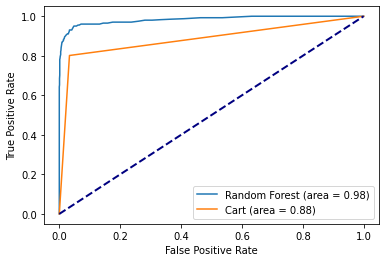

In [78]:
y_pred_proba_rf = rf.predict_proba(X_test_cv)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba_rf)
roc_auc = auc(fpr, tpr)

#create ROC curve
plt.plot(fpr,tpr, label='Random Forest (area = %0.2f)' % roc_auc)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

y_pred_proba_cart = cart.predict_proba(X_test_cv)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba_cart)
roc_auc = auc(fpr, tpr)
plt.plot(fpr,tpr, label='Cart (area = %0.2f)' % roc_auc)
plt.plot([0,1],[0,1],color="navy",lw=2,linestyle="--")


plt.legend()
plt.show()

#ROC of random forest is larger so its AUC is better

In [79]:
pd.DataFrame([['CART', round((accuracy_score(y_test, y_test_pred_cart) * 100),1)], ['Random Forest', round((accuracy_score(y_test, y_test_pred_rf) * 100),1)]],columns=['Model','Testing Accuracy'])

,Model,Testing Accuracy
0,CART,92.8
1,Random Forest,95.9


Random forest is better in terms of AUC and accuracy

#Conclusion: 
1. In this experiment I performed text analysis using CART and Random Forest Model. 
2. I performed text processing by converting corpus to lowercase, removing punctuation, stemming and tokenisation. 
3. I observed that random forest gave better results than cart model in terms of AUC and accuracy. 
4. This is because Random forests consist of multiple single trees each based on a random sample of the training data. They are typically more accurate than single decision trees.